# DiffusionClassifier

This notebook illustrates the classification of the nodes of a graph by [DiffusionClassifier](https://scikit-network.readthedocs.io/en/latest/reference/classification.html), based on the labels of a few nodes.

In [2]:
%matplotlib inline
import networkx as nx
import numpy as np
import sknetwork as skn

/home/nathan/.local/lib/python3.7/site-packages/numba/types/containers.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:
COLORS = ['r', 'b', 'g', 'c', 'm', 'y']

## Undirected graphs

**Loading**

In [4]:
adjacency, labels_true = skn.data.karate_club(return_labels=True)

**Classification**

In [5]:
seeds = {i: labels_true[i] for i in [0, 33]}

In [6]:
maxdiff = skn.classification.DiffusionClassifier()
labels_pred = maxdiff.fit_transform(adjacency, seeds)

In [7]:
precision = np.round(np.mean(labels_pred == labels_true), 2)
precision

0.88

**Visualization**

In [9]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [10]:
pos = nx.spring_layout(graph)

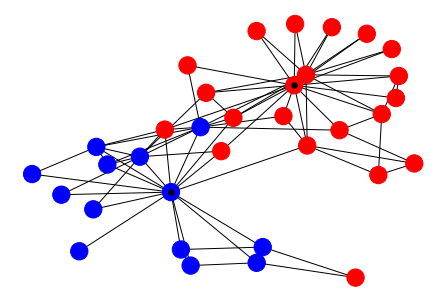

In [11]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=[COLORS[labels_pred[i]] for i in graph])
nx.draw_networkx_nodes(graph, pos, nodelist=list(seeds.keys()), node_color='k', node_size=30)

## Directed graphs

**Loading**

In [14]:
adjacency, names = skn.data.painters(return_labels=True)

**Classification**

In [15]:
rembrandt = 5
klimt = 6
cezanne = 11
seeds = {cezanne: 0, rembrandt: 1, klimt: 2}

In [21]:
maxdiff = skn.classification.DiffusionClassifier()
labels = maxdiff.fit_transform(adjacency, seeds)

**Visualization**

In [18]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [19]:
pos = nx.spring_layout(graph)

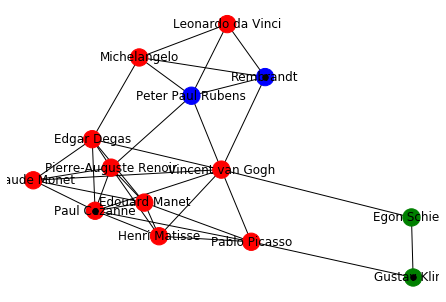

In [22]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=[COLORS[labels[i]] for i in graph], labels=names)
nx.draw_networkx_nodes(graph, pos, nodelist=list(seeds.keys()), node_color='k', node_size=30)

## Bipartite graphs

**Loading**

In [23]:
biadjacency, movies, actors = skn.data.movie_actor(return_labels=True)

**Ranking**

In [24]:
inception = 0
drive = 3
budapest = 8

In [25]:
seeds = {inception: 0, drive: 1, budapest: 2}

In [26]:
bimaxdiff = skn.classification.BiDiffusionClassifier()
labels = bimaxdiff.fit_transform(biadjacency, seeds)

In [27]:
[movies[i] for i, l in enumerate(labels) if l == seeds[budapest]]

['The Grand Budapest Hotel',
 'Aviator',
 '007 Spectre',
 'Inglourious Basterds',
 'Midnight In Paris',
 'Murder on the Orient Express',
 'Fantastic Beasts 2']